In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import json
import isodate

In [57]:
df = pd.read_csv('MarquesBrownlee.csv')

In [58]:
df = df[['publish_date', 'view_count']]

In [59]:
df['publish_date'] = pd.to_datetime(df['publish_date'])

In [60]:
df.head()

,publish_date,view_count
0,2008-05-30,2420
1,2008-09-16,14148
2,2009-01-01,2557
3,2009-01-01,2270
4,2009-01-29,3479


In [61]:
df = df.loc[df['publish_date'] > ('2012-01-01')]

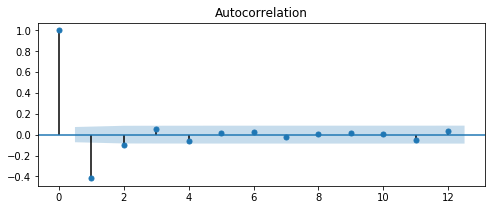

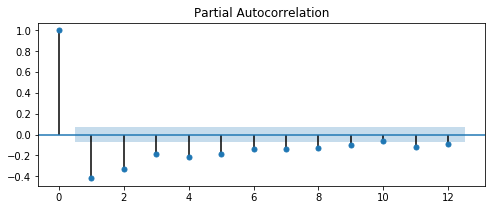

In [75]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

fig, ax = plt.subplots(figsize=(8,3))
plot_acf(df.view_count.diff().dropna(),ax=ax, lags=12);

fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(data_diff,ax=ax, lags=12);


In [71]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.view_count.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.539159
p-value: 0.106235


In [72]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.view_count.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.115462
p-value: 0.000000


/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


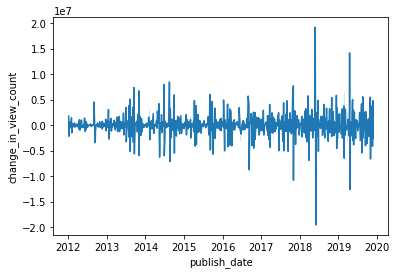

In [51]:
sns.lineplot(df.publish_date, df.change_in_view_count)

In [147]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

# Fit an ARMA(2,1) model to the first simulated data
mod_arma = ARIMA(df.view_count, order=(1,1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print(res_arma.summary())

# Print out the estimate for the constant and for theta
print(res_arma.params)

                             ARIMA Model Results                              
Dep. Variable:           D.view_count   No. Observations:                  724
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -11598.170
Method:                       css-mle   S.D. of innovations        2192382.111
Date:                Wed, 27 Nov 2019   AIC                          23202.339
Time:                        10:43:23   BIC                          23216.094
Sample:                             1   HQIC                         23207.648
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5779.9088   5.74e+04      0.101      0.920   -1.07e+05    1.18e+05
ar.L1.D.view_count    -0.4192      0.034    -12.423      0.000      -0.485      -0.353
                    

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


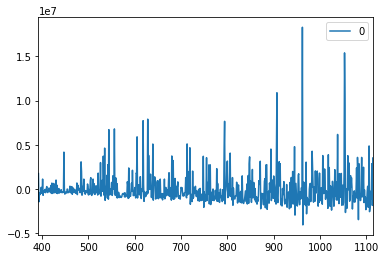

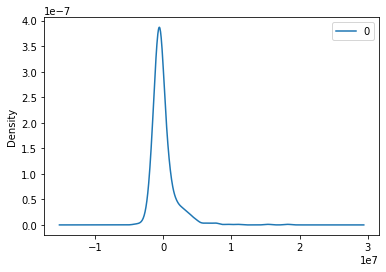

                  0
count  7.240000e+02
mean   4.957909e+03
std    1.827499e+06
min   -4.036382e+06
25%   -9.324631e+05
50%   -3.890881e+05
75%    3.412885e+05
max    1.826740e+07


In [68]:
residuals = pd.DataFrame(res_arma.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [173]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df[:625]
test = df[625:]

In [174]:
train.set_index('publish_date', inplace = True)
test.set_index('publish_date', inplace = True)

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


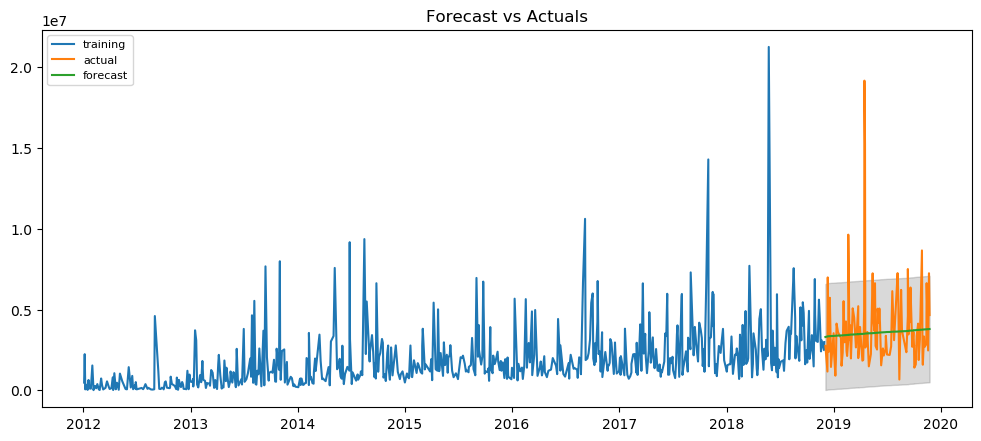

In [185]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train.view_count, order=(1, 1, 1)) 
fitted = model.fit()  


# Forecast
fc, se, conf = fitted.forecast(100, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()
